# Thực hiện trực quan hóa dữ liệu trên tập dữ liệu về phân loại chất lượng [rượu đỏ](https://www.kaggle.com/code/eisgandar/red-wine-quality-eda-classification)

## I. Thống kê mô tả:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./winequality-red.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## II. Trực quan hóa dữ liệu:


### 1. Biểu đồ số lượng mẫu theo từng mức chất lượng rượu (Countplot):

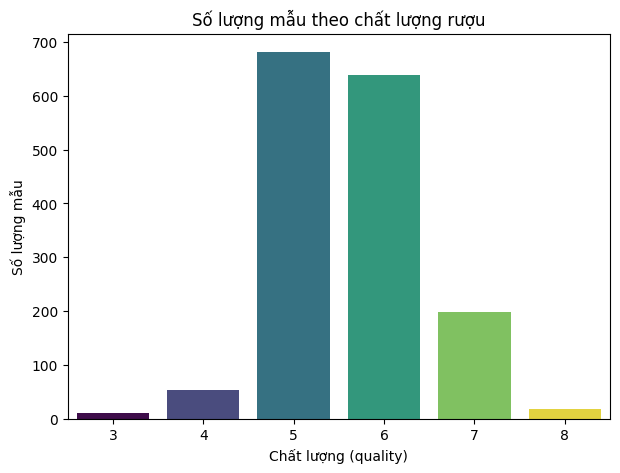

In [5]:
plt.figure(figsize=(7, 5))
sns.countplot(x="quality", data=df, palette="viridis", hue="quality", legend=False)
plt.title("Số lượng mẫu theo chất lượng rượu")
plt.xlabel("Chất lượng (quality)")
plt.ylabel("Số lượng mẫu")
plt.show()

**Nhận xét**
- Biểu đồ thể hiện số lượng mẫu rượu đỏ theo từng mức chất lượng (quality) trong tập dữ liệu.
- Dễ dàng nhận thấy phần lớn mẫu rượu tập trung ở mức chất lượng 5 và 6, chiếm đa số so với các mức còn lại.
- Các mức chất lượng thấp (3, 4) và cao (7, 8) có số lượng mẫu rất ít, cho thấy dữ liệu bị lệch về phía trung bình.
- Điều này phản ánh rằng đa số rượu đỏ trong tập dữ liệu có chất lượng trung bình, ít mẫu có chất lượng quá thấp hoặc quá cao.
- Việc phân bố không đều này có thể ảnh hưởng đến quá trình huấn luyện mô hình, đặc biệt nếu dự đoán các mức chất lượng hiếm gặp.

### 2. Biểu đồ histogram phân phối các đặc trưng:

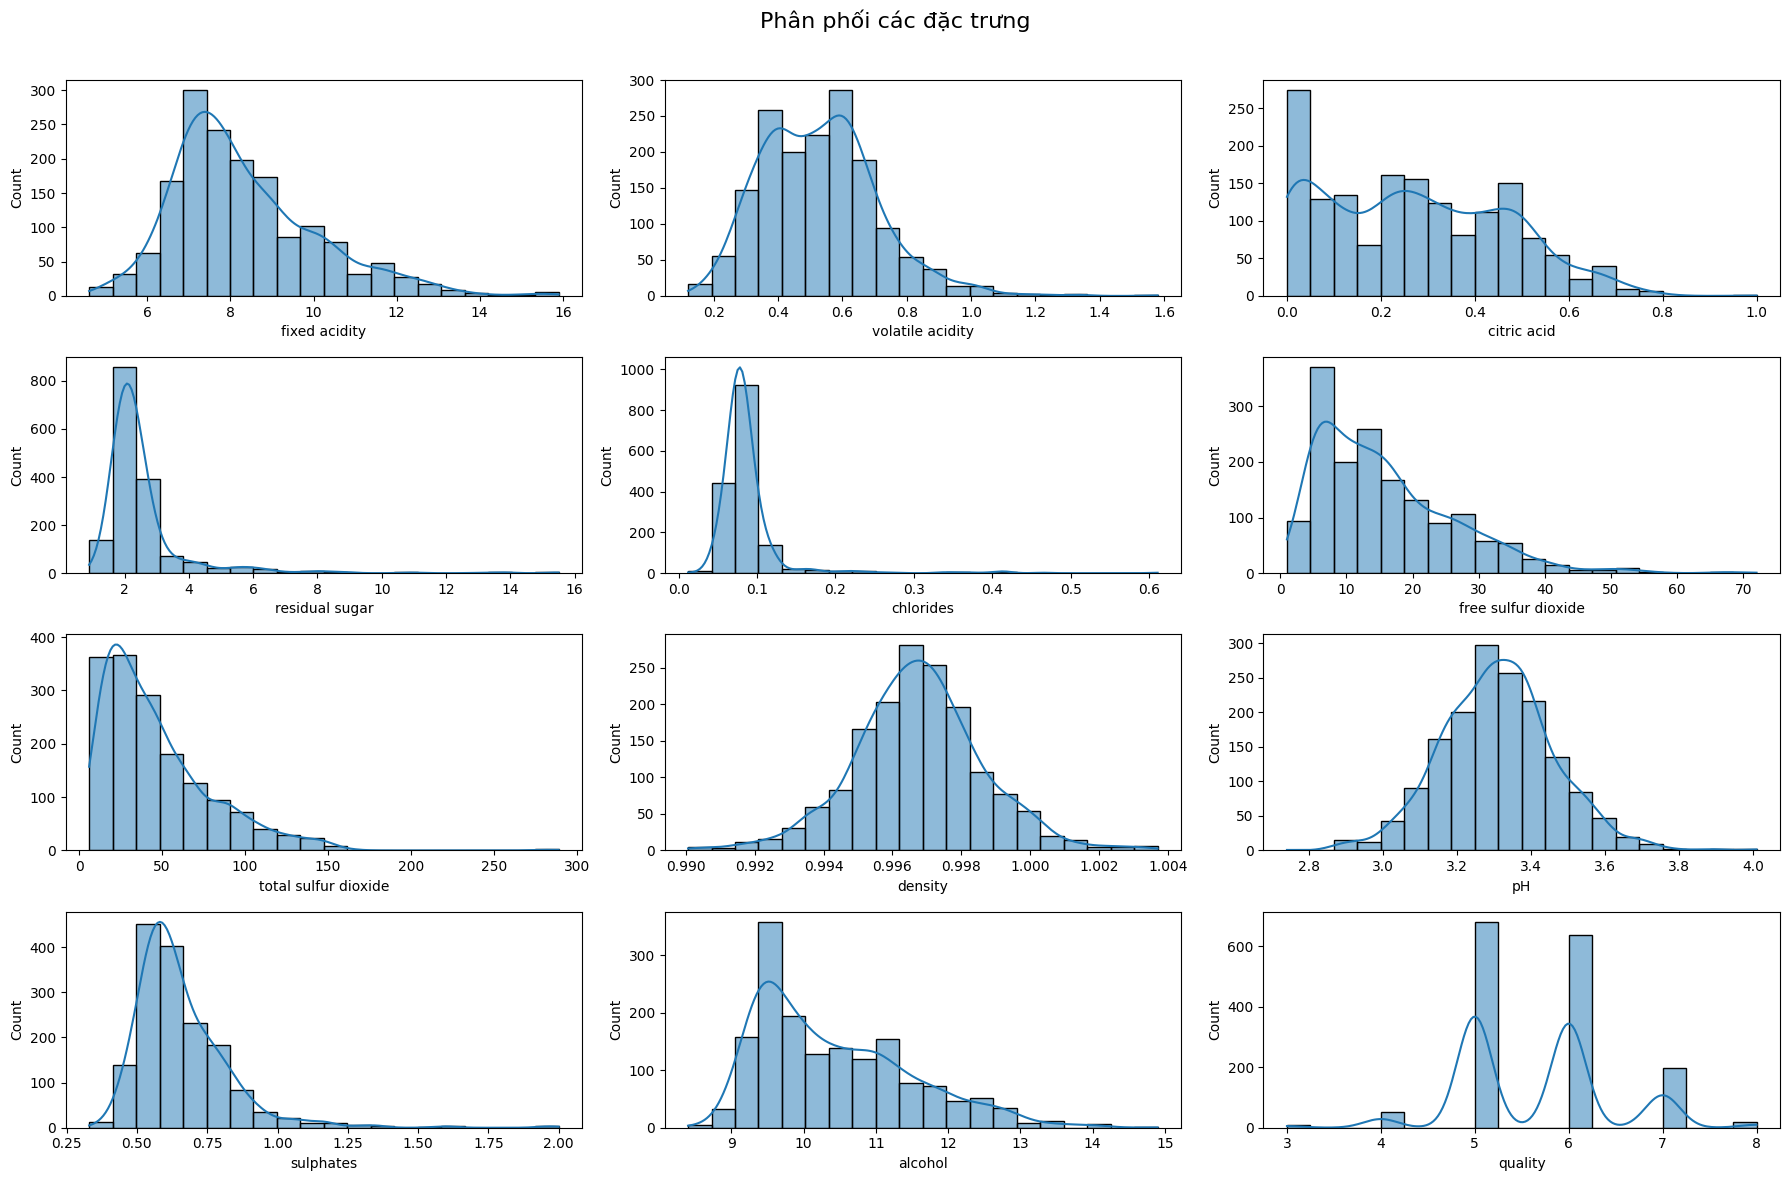

In [6]:
# df.hist(bins=20, figsize=(15, 12), color="skyblue", edgecolor="black")
# plt.suptitle("Phân phối các đặc trưng", fontsize=16)
# plt.show()

features = df.columns.tolist()
n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.histplot(df[col], bins=20, edgecolor="black", ax=axes[i], kde=True)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Phân phối các đặc trưng", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

**Nhận xét**
- Biểu đồ cho thấy phân phối của từng đặc trưng trong tập dữ liệu rượu đỏ.
- Các đặc trưng như `residual sugar`, `chlorides`, `free sulfur dioxide`, `total sulfur dioxide`, `sulphates`, `alcohol` có phân phối lệch phải, tức là phần lớn giá trị tập trung ở mức thấp và giảm dần về phía giá trị cao.
- `fixed acidity`, `volatile acidity`, `citric acid`, `pH` có phân phối gần với chuẩn hoặc lệch nhẹ.
- Đặc trưng `density` và `pH` có phân phối khá tập trung, gần với phân phối chuẩn.
- Đặc trưng mục tiêu `quality` có phân phối rời, tập trung chủ yếu ở các mức 5, 6 và rất ít ở các mức còn lại.
- Đường KDE giúp nhận diện rõ hơn xu hướng phân phối và sự xuất hiện của các giá trị ngoại lai.
- Việc nhận diện phân phối này giúp xác định các đặc trưng cần chuẩn hóa, biến đổi hoặc xử lý ngoại lai trước khi xây dựng mô hình.

### 3. Biểu đồ boxplot các đặc trưng theo chất lượng rượu:

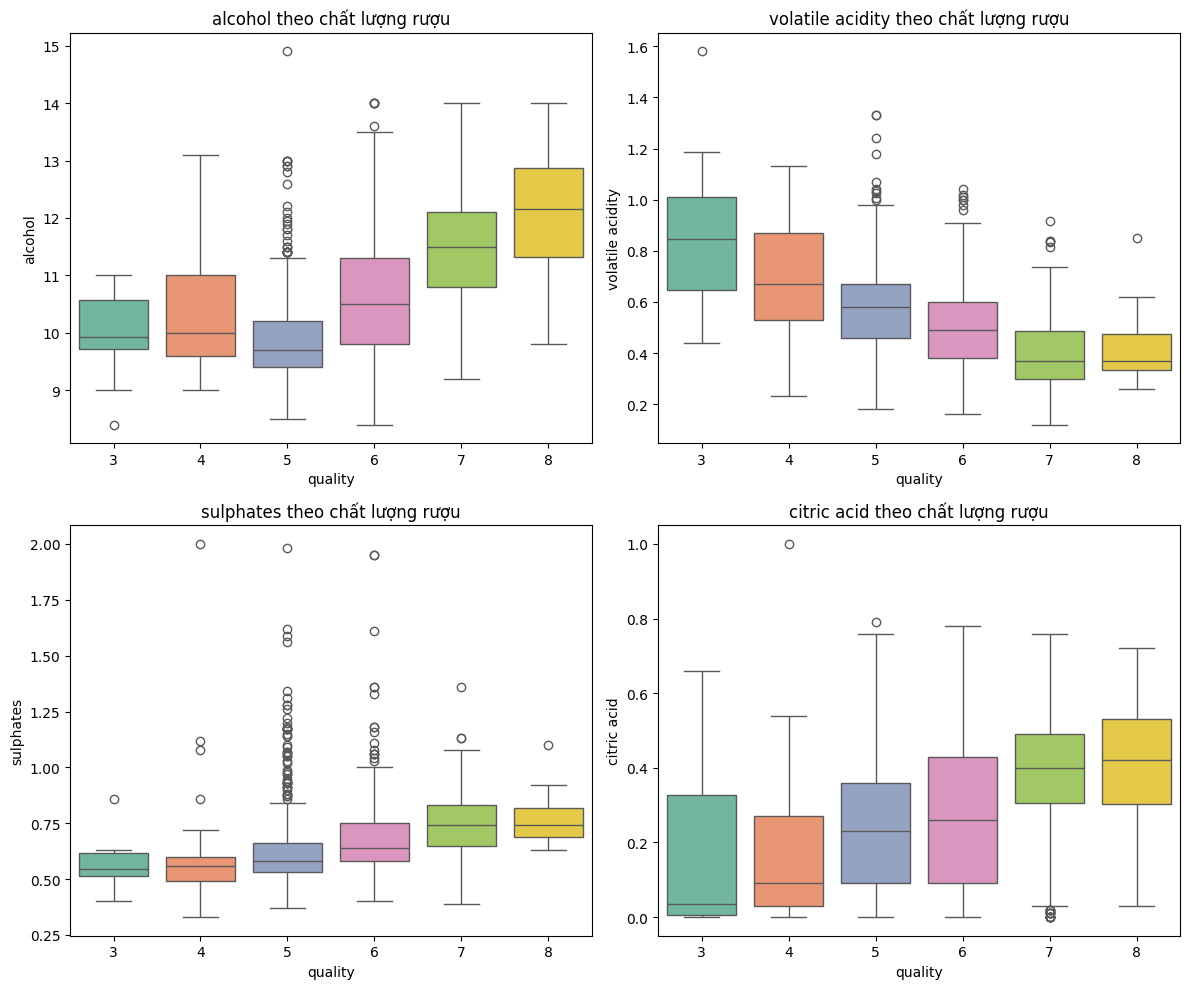

In [7]:
features = ["alcohol", "volatile acidity", "sulphates", "citric acid"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, feat in zip(axes.flat, features):
    sns.boxplot(
        x="quality", y=feat, data=df, palette="Set2", ax=ax, hue="quality", legend=False
    )
    ax.set_title(f"{feat} theo chất lượng rượu")

plt.tight_layout()
plt.show()


**Nhận xét**
- **Alcohol:** Hàm lượng alcohol có xu hướng tăng dần theo chất lượng rượu. Rượu chất lượng cao thường có nồng độ alcohol lớn hơn.
- **Volatile acidity:** Độ axit bay hơi giảm khi chất lượng rượu tăng. Rượu chất lượng thấp có volatile acidity cao hơn.
- **Sulphates:** Giá trị sulphates có xu hướng tăng nhẹ ở các mức chất lượng cao, nhưng sự khác biệt không quá rõ rệt.
- **Citric acid:** Hàm lượng citric acid tăng dần theo chất lượng rượu, đặc biệt ở các mức chất lượng cao.
- Các biểu đồ đều xuất hiện một số giá trị ngoại lai (outlier), thể hiện bằng các dấu chấm ngoài hộp.
- Nhìn chung, các đặc trưng alcohol, volatile acidity và citric acid có mối liên hệ rõ rệt với chất lượng rượu, có thể dùng để phân biệt các mức chất lượng trong phân tích hoặc xây dựng mô hình.

### 4. Biểu đồ scatterplot: Alcohol vs Volatile Acidity theo chất lượng:

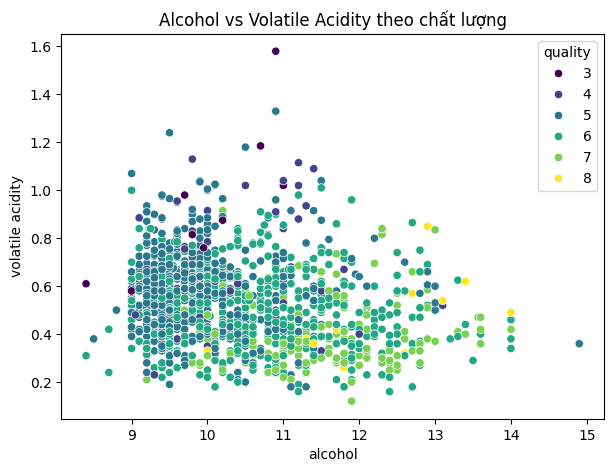

In [8]:
plt.figure(figsize=(7, 5))
sns.scatterplot(
    x="alcohol", y="volatile acidity", hue="quality", data=df, palette="viridis"
)
plt.title("Alcohol vs Volatile Acidity theo chất lượng")
plt.show()


**Nhận xét**
- Các mẫu rượu chất lượng cao (màu sáng hơn) thường có hàm lượng **alcohol** cao và **volatile acidity** thấp.
- Ngược lại, các mẫu rượu chất lượng thấp (màu tối hơn) tập trung ở vùng **alcohol** thấp và **volatile acidity** cao.
- Có thể thấy xu hướng: khi **alcohol** tăng và **volatile acidity** giảm thì chất lượng rượu có xu hướng tăng.
- Biểu đồ giúp nhận diện rõ ràng hai đặc trưng này (**alcohol**, **volatile acidity**) có vai trò quan trọng trong việc phân biệt chất lượng rượu đỏ.

### 5. Biểu đồ scatterplot: Alcohol vs Sulphates theo chất lượng:

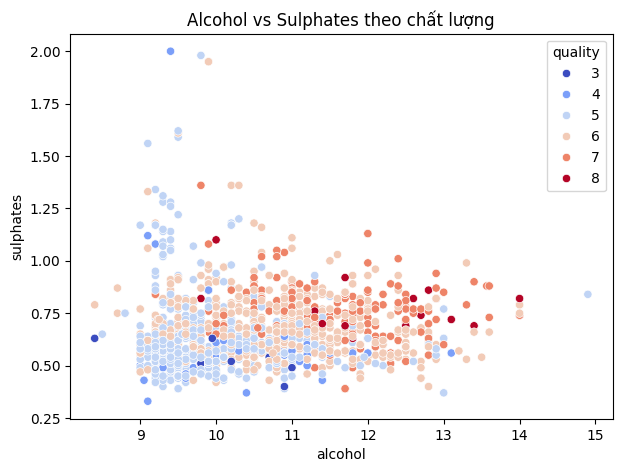

In [9]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x="alcohol", y="sulphates", hue="quality", data=df, palette="coolwarm")
plt.title("Alcohol vs Sulphates theo chất lượng")
plt.show()

**Nhận xét**
- Các mẫu rượu có **quality** cao (màu đỏ) thường tập trung ở vùng có **alcohol** cao và **sulphates** lớn hơn.
- Các mẫu rượu có **quality** thấp (màu xanh) chủ yếu xuất hiện ở vùng **alcohol** thấp và **sulphates** thấp.
- Nhìn chung, khi **alcohol** và **sulphates** tăng thì chất lượng rượu có xu hướng tăng.
- Biểu đồ cho thấy cả hai biến **alcohol** và **sulphates** đều có vai trò trong việc phân biệt chất lượng rượu đỏ.

### 6. Biểu đồ Ma trận tương quan giữa các đặc trưng (heatmap):

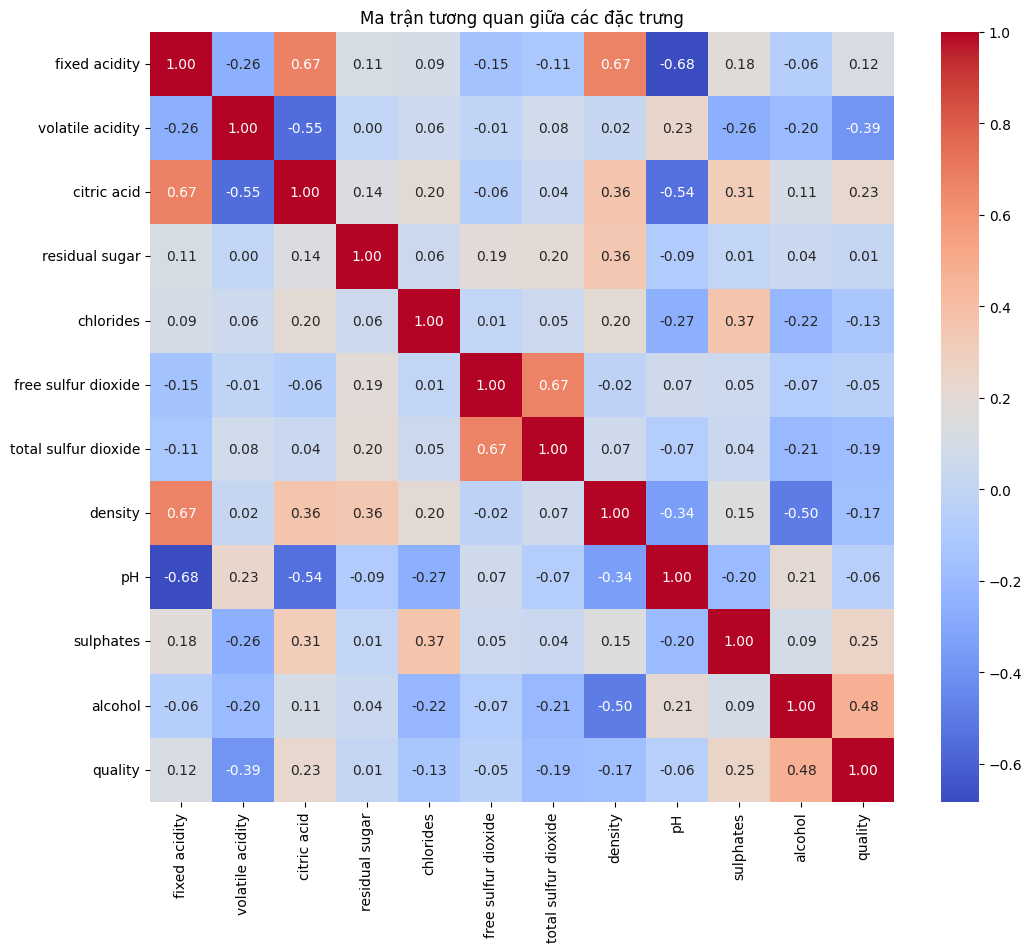

In [10]:
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Ma trận tương quan giữa các đặc trưng")
plt.show()

**Nhận xét**
- **alcohol** có tương quan dương khá mạnh với **quality** (0.48), cho thấy rượu có nồng độ alcohol cao thường có chất lượng tốt hơn.
- **volatile acidity** có tương quan âm với **quality** (-0.39), nghĩa là độ axit bay hơi cao thường đi kèm chất lượng thấp.
- **sulphates** cũng có tương quan dương với **quality** (0.25), cho thấy sulphates cao có thể liên quan đến chất lượng rượu tốt.
- Các cặp biến có tương quan mạnh với nhau:  
  - **fixed acidity** và **citric acid** (0.67)  
  - **free sulfur dioxide** và **total sulfur dioxide** (0.67)  
  - **density** và **fixed acidity** (0.67)
- **pH** có tương quan âm mạnh với **fixed acidity** (-0.68), phản ánh mối liên hệ hóa học giữa độ axit và độ pH.
- Đa số các đặc trưng còn lại có tương quan yếu với **quality**, cho thấy chúng ít ảnh hưởng trực tiếp đến chất lượng rượu.

# Kết thúc